In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn import linear_model

In [2]:
df = pd.read_csv('baseballdatabank-master/core/Teams.csv')

In [146]:
features = ['R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','IPouts','HA','HRA','BBA','SOA','E','DP','FP']

In [147]:
df.head()
df = df[df.yearID>1990]
df = df[(df.yearID != 1994) & (df.yearID != 1995)]

In [148]:
df_features = df[features]

In [149]:
df_features.reset_index(inplace = True, drop = True)
df_features

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,749,5456,1407,255,30,141,563.0,906.0,165.0,76.0,...,18,7,4358,1304,118,481,969,138,122,0.978
1,686,5604,1421,256,29,170,528.0,974.0,50.0,33.0,...,8,8,4373,1534,147,504,868,91,172,0.985
2,731,5530,1486,305,25,126,593.0,820.0,59.0,39.0,...,15,13,4319,1405,147,530,999,116,165,0.981
3,653,5470,1396,245,29,115,448.0,928.0,94.0,56.0,...,18,10,4325,1351,141,543,990,102,156,0.984
4,758,5594,1464,226,39,139,610.0,896.0,134.0,74.0,...,28,8,4434,1302,154,601,923,116,151,0.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,...,1,14,4332,1284,191,545,1399,66,168,0.989
792,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,...,0,12,4423,1274,181,453,1621,87,126,0.985
793,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,...,4,9,4314,1515,241,583,1379,105,143,0.982
794,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,...,1,7,4321,1450,228,604,1332,96,141,0.984


In [150]:
df_features.isna().sum()

R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
CS        0
HBP       0
SF        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

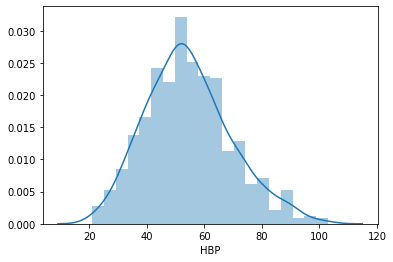

In [151]:
sns.distplot(df_features.HBP)

In [152]:
df_features.HBP.mode()

0    52.0
dtype: float64

In [153]:
df_features.HBP.median()

53.0

In [154]:
df_features.HBP.mean()

54.459798994974875

In [155]:
df_features.HBP.std()

14.867452678315

In [156]:
df_features.HBP= df_features.HBP.fillna(df_features.HBP.median())

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [157]:
df_features.SF.mean()

45.017587939698494

In [158]:
df_features.SF.std()

8.987885191321853

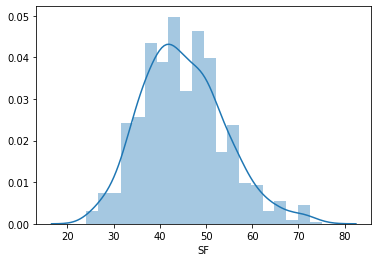

In [159]:
sns.distplot(df_features.SF)

In [160]:
df_features.SF = df_features.SF.fillna(round(df_features.SF.mean()))

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [161]:
df_target = df['W']

In [162]:
df_target

2073    94
2074    67
2075    84
2076    81
2077    87
        ..
2920    91
2921    96
2922    78
2923    67
2924    93
Name: W, Length: 796, dtype: int64

In [163]:
df = df[df.yearID>1961]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)

In [165]:
scaler = StandardScaler()

In [166]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

In [168]:
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [169]:
lm = LinearRegression()

In [170]:
lm = lm.fit(X_train, y_train)

In [171]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       796 non-null    int64  
 1   AB      796 non-null    int64  
 2   H       796 non-null    int64  
 3   2B      796 non-null    int64  
 4   3B      796 non-null    int64  
 5   HR      796 non-null    int64  
 6   BB      796 non-null    float64
 7   SO      796 non-null    float64
 8   SB      796 non-null    float64
 9   CS      796 non-null    float64
 10  HBP     796 non-null    float64
 11  SF      796 non-null    float64
 12  RA      796 non-null    int64  
 13  ER      796 non-null    int64  
 14  ERA     796 non-null    float64
 15  CG      796 non-null    int64  
 16  SHO     796 non-null    int64  
 17  IPouts  796 non-null    int64  
 18  HA      796 non-null    int64  
 19  HRA     796 non-null    int64  
 20  BBA     796 non-null    int64  
 21  SOA     796 non-null    int64  
 22  E 

In [172]:
df_features

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,749,5456,1407,255,30,141,563.0,906.0,165.0,76.0,...,18,7,4358,1304,118,481,969,138,122,0.978
1,686,5604,1421,256,29,170,528.0,974.0,50.0,33.0,...,8,8,4373,1534,147,504,868,91,172,0.985
2,731,5530,1486,305,25,126,593.0,820.0,59.0,39.0,...,15,13,4319,1405,147,530,999,116,165,0.981
3,653,5470,1396,245,29,115,448.0,928.0,94.0,56.0,...,18,10,4325,1351,141,543,990,102,156,0.984
4,758,5594,1464,226,39,139,610.0,896.0,134.0,74.0,...,28,8,4434,1302,154,601,923,116,151,0.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,...,1,14,4332,1284,191,545,1399,66,168,0.989
792,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,...,0,12,4423,1274,181,453,1621,87,126,0.985
793,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,...,4,9,4314,1515,241,583,1379,105,143,0.982
794,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,...,1,7,4321,1450,228,604,1332,96,141,0.984


In [173]:
df_features.isna().sum()

R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
CS        0
HBP       0
SF        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

In [174]:
#y_train_pred = lm_2.predict(X_train)

#train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


#print('Training Root Mean Squared Error:' , train_rmse)

In [175]:
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.3304811448505616


In [176]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3.899397136904019
Training:  3 vs. Testing:  3


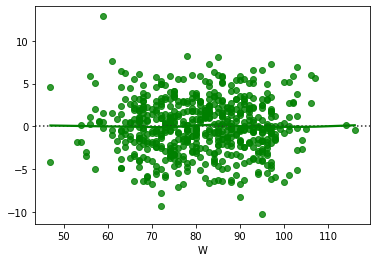

In [177]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

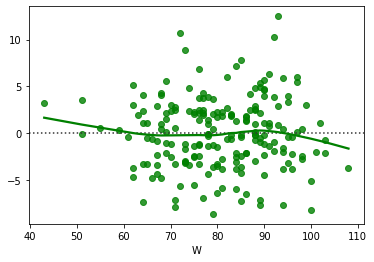

In [178]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [179]:
lm.coef_

array([  7.39142795,  -5.29328654,   4.37213615,  -0.16796468,
        -0.08493852,   0.86536312,  -0.61448041,  -0.19529306,
         0.43557769,  -1.00823764,   0.07637468,  -0.30717994,
        -3.91314637, -24.88100399,  24.94945031,  -0.15337654,
         0.83698004,   5.5018691 ,  -0.6515847 ,  -0.82585102,
        -0.76865396,  -0.23040273,  -3.76352771,  -0.07984905,
        -3.33258246])

In [180]:
X_train.columns


Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA',
       'E', 'DP', 'FP'],
      dtype='object')

In [205]:
f = "W~R+AB+H+HR+BB+SO+SB+CS+HBP+SF+RA+ER+ERA+CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP+FP"
df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'run_diff'],
      dtype='object')

In [206]:
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     342.5
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:52:56   Log-Likelihood:                -2119.2
No. Observations:                 796   AIC:                             4286.
Df Residuals:                     772   BIC:                             4399.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    731.7417    354.404      2.065      0.039      36.031    1427.452
R              0.0844      0.006     15.130      0.000       0.073       0.095
AB            -0.0636      0.005    -12.273      0.000      -0.074      -0.053
H              0.0512      0.006      8.790      0.000       0.040       0.063
HR             0.0252      0.007      3.575      0.000       0.011       0.039
BB            -0.0071      0.003     -2.432      0.015      -0.013      -0.001
SO            -0.0008      0.001     -0.584      0.560      -0.004       0.002
SB             0.0084      0.005      1.597      0.111      -0.002       0.019
CS            -0.0522      0.015     -3.447      0.001      -0.082      -0.022
HBP           -0.0041      0.009     -0.438      0.661      -0.023       0.014
SF            -0.0456      0.019     -2.424      0.016      -0.082      -0.009
RA            -0.0438      0.014     -3.104      0.002      -0.071      -0.016
ER            -0.2671      0.137     -1.947      0.052      -0.536       0.002
ERA           39.8353     21.801      1.827      0.068      -2.960      82.631
CG            -0.0333      0.033     -1.002      0.317      -0.098       0.032
SHO            0.1831      0.046      4.003      0.000       0.093       0.273
IPouts         0.1231      0.022      5.520      0.000       0.079       0.167
HA            -0.0026      0.004     -0.639      0.523      -0.010       0.005
HRA           -0.0163      0.008     -2.054      0.040      -0.032      -0.001
BBA           -0.0085      0.003     -2.750      0.006      -0.015      -0.002
SOA           -0.0010      0.001     -0.677      0.498      -0.004       0.002
E             -0.1713      0.058     -2.963      0.003      -0.285      -0.058
DP            -0.0077      0.009     -0.878      0.380      -0.025       0.010
FP          -905.2492    354.700     -2.552      0.011   -1601.541    -208.958
==============================================================================
Omnibus:                        2.716   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.821
Skew:                          -0.051   Prob(JB):                        0.244
Kurtosis:                       3.273   Cond. No.                     3.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

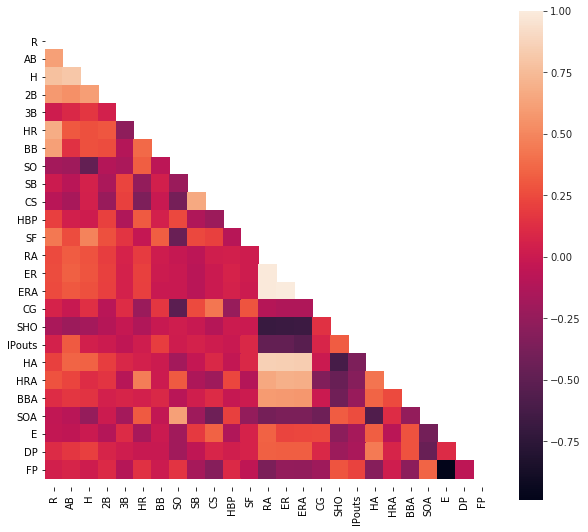

In [183]:
#Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df_features.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df_features.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [184]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
#X_train.drop(columns=to_drop, inplace=False)
#X_test.drop(columns=to_drop, inplace=False)
to_drop
X_train.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)
X_test.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)

In [185]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,RA,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP
R,NaN,0.598278,0.758459,0.566436,0.022213,0.668979,0.616793,0.137963,0.000331,0.122005,...,0.229995,0.066411,0.133102,0.074729,0.177961,0.292224,0.117464,0.033156,0.042038,0.107640
AB,NaN,NaN,0.801242,0.512918,0.073074,0.294174,0.136832,0.199745,0.084486,0.176642,...,0.329825,0.005759,0.205829,0.320576,0.353775,0.250508,0.178990,0.098303,0.061460,0.182671
H,NaN,NaN,NaN,0.576781,0.138184,0.241335,0.259934,0.476133,0.049659,0.017059,...,0.250678,0.145640,0.143720,0.050780,0.307680,0.121762,0.133253,0.248223,0.006665,0.214434
2B,NaN,NaN,NaN,NaN,0.005720,0.312108,0.247987,0.067963,0.144904,0.259858,...,0.191471,0.084312,0.091206,0.005793,0.191236,0.177225,0.048788,0.022464,0.102559,0.107021
3B,NaN,NaN,NaN,NaN,NaN,0.301432,0.131320,0.119598,0.247267,0.209855,...,0.001586,0.117578,0.002157,0.013205,0.020001,0.107015,0.035645,0.136363,0.083558,0.020697
HR,NaN,NaN,NaN,NaN,NaN,NaN,0.365303,0.354026,0.271337,0.376606,...,0.200390,0.227270,0.130119,0.023151,0.036888,0.468781,0.059945,0.308854,0.146799,0.014405
BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026686,0.035870,0.033807,...,0.007854,0.138244,0.000991,0.224136,0.023589,0.019470,0.082604,0.003103,0.016622,0.027488
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206930,0.380867,...,0.008483,0.520669,0.009540,0.006360,0.167043,0.328038,0.062588,0.613668,0.201716,0.183256
SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647683,...,0.081194,0.239645,0.002550,0.071341,0.039665,0.149549,0.040595,0.213576,0.167980,0.033967
CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003118,0.445101,0.091327,0.046739,0.055457,0.219367,0.101562,0.407806,0.337829,0.046723


In [186]:
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 22)

In [187]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

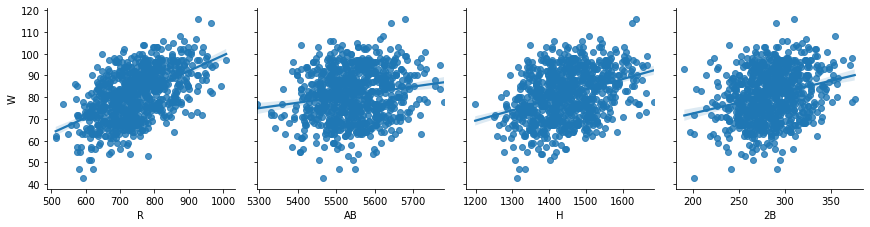

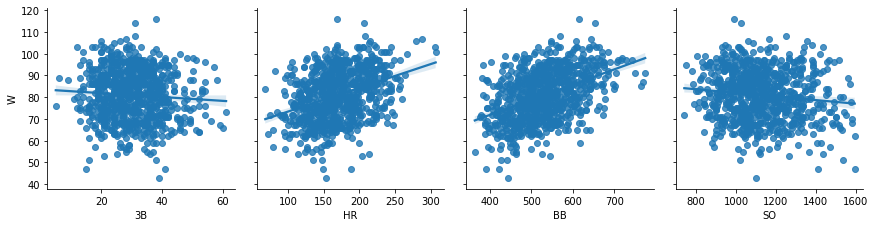

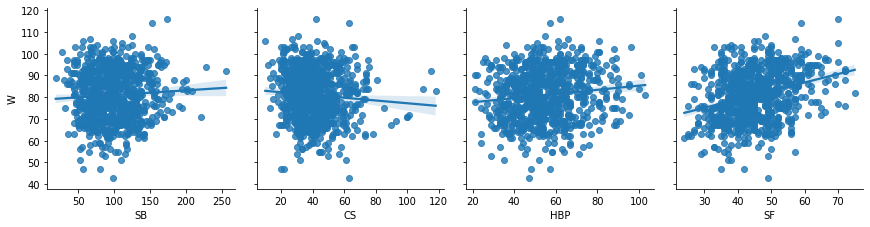

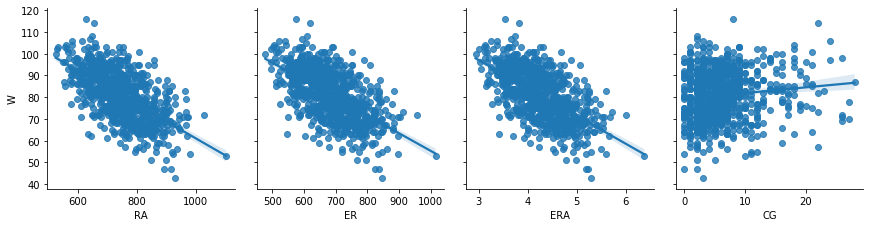

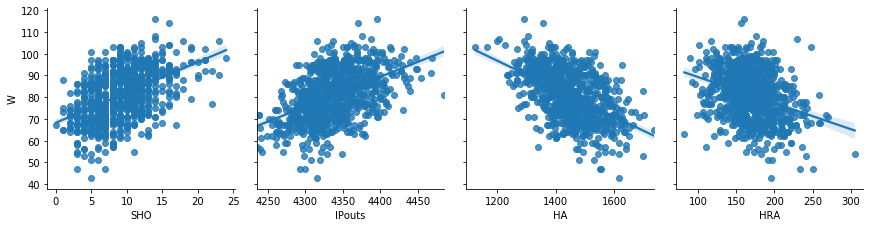

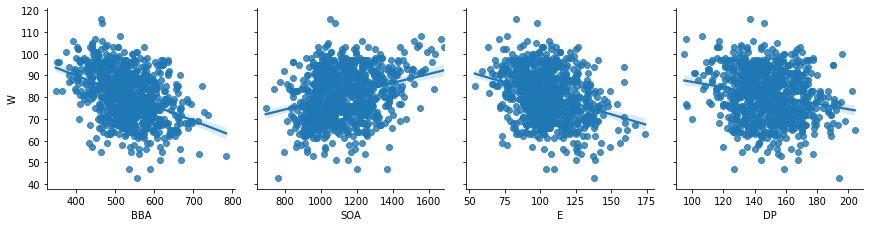

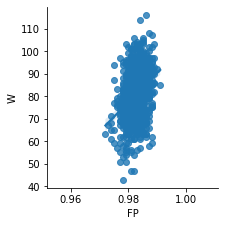

In [188]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['W'],x_vars=i, kind="reg", height=3)

In [189]:
df[df['yearID']==1994]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,run_diff


In [190]:
df[df['G']<162]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,run_diff
2078,1991,NL,CHN,CHC,E,4,160,83.0,77,83,...,0.982,Chicago Cubs,Wrigley Field,2314250.0,104,105,CHC,CHN,CHN,-39
2087,1991,NL,MON,WSN,E,6,161,68.0,71,90,...,0.979,Montreal Expos,Stade Olympique,934742.0,99,99,MON,MON,MON,-76
2089,1991,NL,NYN,NYM,E,5,161,82.0,77,84,...,0.977,New York Mets,Shea Stadium,2284484.0,99,99,NYM,NYN,NYN,-6
2212,1996,AL,CAL,ANA,W,4,161,81.0,70,91,...,0.979,California Angels,Anaheim Stadium,1820521.0,98,98,CAL,CAL,CAL,-181
2216,1996,AL,CLE,CLE,C,1,161,80.0,99,62,...,0.980,Cleveland Indians,Jacobs Field,3318174.0,99,98,CLE,CLE,CLE,183
2221,1996,AL,KCA,KCR,C,5,161,80.0,75,86,...,0.982,Kansas City Royals,Kauffman Stadium,1435997.0,99,100,KCR,KCA,KCA,-40
2232,1996,AL,SEA,SEA,W,2,161,81.0,85,76,...,0.982,Seattle Mariners,Kingdome,2723850.0,100,99,SEA,SEA,SEA,98
2241,1997,AL,CHA,CHW,C,2,161,81.0,80,81,...,0.978,Chicago White Sox,Comiskey Park II,1864782.0,96,96,CHW,CHA,CHA,-54
2244,1997,AL,CLE,CLE,C,1,161,81.0,86,75,...,0.983,Cleveland Indians,Jacobs Field,3404750.0,103,102,CLE,CLE,CLE,53
2249,1997,AL,KCA,KCR,C,5,161,80.0,67,94,...,0.985,Kansas City Royals,Kauffman Stadium,1517638.0,101,102,KCR,KCA,KCA,-73


In [191]:
pd.set_option('display.max_rows', 300)

In [192]:
df[df['AB']<4500]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,run_diff


In [193]:
df_features['run_diff'] = df_features['R'] - df_features['RA']
df['run_diff'] = df['R'] - df['RA']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)

In [195]:
scaler = StandardScaler()

In [196]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [197]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [198]:
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.474018903739533


In [199]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3.475481232614984
Training:  3 vs. Testing:  3


In [200]:
lm.coef_

array([-1.61222913e+13, -5.34819914e+00,  4.98110151e+00, -1.13496292e-01,
       -3.59548465e-01,  7.34465464e-01, -3.96771896e-01,  5.02484554e-02,
        3.50271201e-01, -7.33712428e-01,  7.05104575e-02, -3.91188224e-01,
        1.71246244e+13, -3.48004654e+01,  3.45547902e+01, -1.45697107e-01,
        6.66627424e-01,  5.86122038e+00, -1.40508907e-01, -5.48166966e-01,
       -4.56426981e-01, -9.29027584e-02, -4.12887270e+00, -9.60726163e-02,
       -3.51476049e+00,  1.98064037e+13])

In [203]:
f = "W~R+AB+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP+run_diff"

In [204]:
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     389.5
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:52:41   Log-Likelihood:                -2124.6
No. Observations:                 796   AIC:                             4291.
Df Residuals:                     775   BIC:                             4389.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2579     16.577      0.498      0.619     -24.284      40.800
R              0.0366      0.004      8.706      0.000       0.028       0.045
AB            -0.0632      0.005    -12.148      0.000      -0.073      -0.053
H              0.0506      0.006      8.645      0.000       0.039       0.062
HR             0.0239      0.007      3.373      0.001       0.010       0.038
BB            -0.0072      0.003     -2.491      0.013      -0.013      -0.002
SO            -0.0008      0.001     -0.602      0.547      -0.004       0.002
SB             0.0087      0.005      1.639      0.102      -0.002       0.019
CS            -0.0537      0.015     -3.557      0.000      -0.083      -0.024
HBP           -0.0031      0.009     -0.325      0.745      -0.022       0.015
SF            -0.0440      0.019     -2.349      0.019      -0.081      -0.007
RA            -0.0117      0.004     -2.679      0.008      -0.020      -0.003
CG            -0.0358      0.033     -1.076      0.282      -0.101       0.030
SHO            0.1893      0.046      4.129      0.000       0.099       0.279
IPouts         0.0807      0.006     12.659      0.000       0.068       0.093
HA            -0.0034      0.004     -0.855      0.393      -0.011       0.004
HRA           -0.0164      0.008     -2.106      0.036      -0.032      -0.001
BBA           -0.0089      0.003     -2.945      0.003      -0.015      -0.003
SOA           -0.0001      0.001     -0.096      0.923      -0.003       0.003
E             -0.0164      0.009     -1.909      0.057      -0.033       0.000
DP            -0.0123      0.008     -1.445      0.149      -0.029       0.004
run_diff       0.0483      0.003     17.606      0.000       0.043       0.054
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.395
Skew:                          -0.029   Prob(JB):                        0.498
Kurtosis:                       3.197   Cond. No.                     4.31e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [223]:
df_features['avg'] = df_features['H']/df_features['AB']
df['avg'] = df['H']/df['AB']
df_features['OBP'] = (df_features['H']+df_features['BB']+df_features['HBP'])/(df_features['AB']+df_features['BB']+df_features['HBP']+df_features['SF'])
df['OBP'] = (df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF'])
df['1B'] = df['H']-df['HR']-df['3B']-df['2B']
df_features['1B'] = df_features['H']-df_features['HR']-df_features['3B']-df_features['2B']
df['SLG'] = (df['1B']+2*df['2B']+3*df['3B']+4*df['HR'])/df['AB']
df_features['SLG'] = (df_features['1B']+2*df_features['2B']+3*df_features['3B']+4*df_features['HR'])/df_features['AB']
df['OPS'] = df['OBP'] + df['SLG']
df_features['OPS'] = df_features['OBP'] + df_features['SLG']
df_features.isna().sum()


R           0
AB          0
H           0
2B          0
3B          0
HR          0
BB          0
SO          0
SB          0
CS          0
HBP         0
SF          0
RA          0
ER          0
ERA         0
CG          0
SHO         0
IPouts      0
HA          0
HRA         0
BBA         0
SOA         0
E           0
DP          0
FP          0
run_diff    0
avg         0
OBP         0
1B          0
SLG         0
OPS         0
dtype: int64

In [264]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training Root Mean Squared Error: 3.5052666174393106
Testing Root Mean Squared Error: 3.3038984656996053
Training:  3 vs. Testing:  3


In [226]:
f = "W~R+AB+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP+run_diff+avg+OBP+SLG+OPS"
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:32:27   Log-Likelihood:                -2119.6
No. Observations:                 796   AIC:                             4287.
Df Residuals:                     772   BIC:                             4400.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -240.6229    170.816     -1.409      0.159    -575.941      94.695
R              0.0401      0.004      9.224      0.000       0.032       0.049
AB            -0.0204      0.031     -0.648      0.517      -0.082       0.041
H             -0.0989      0.120     -0.827      0.409      -0.334       0.136
HR             0.0581      0.014      4.086      0.000       0.030       0.086
BB            -0.0588      0.050     -1.169      0.243      -0.157       0.040
SO          4.436e-05      0.001      0.031      0.975      -0.003       0.003
SB             0.0085      0.005      1.614      0.107      -0.002       0.019
CS            -0.0569      0.015     -3.773      0.000      -0.087      -0.027
HBP           -0.0524      0.051     -1.027      0.305      -0.152       0.048
SF            -0.0172      0.031     -0.549      0.583      -0.079       0.044
RA            -0.0091      0.004     -2.058      0.040      -0.018      -0.000
CG            -0.0377      0.033     -1.135      0.257      -0.103       0.027
SHO            0.1906      0.046      4.167      0.000       0.101       0.280
IPouts         0.0798      0.006     12.518      0.000       0.067       0.092
HA            -0.0039      0.004     -0.989      0.323      -0.012       0.004
HRA           -0.0196      0.008     -2.514      0.012      -0.035      -0.004
BBA           -0.0092      0.003     -3.053      0.002      -0.015      -0.003
SOA           -0.0002      0.001     -0.109      0.913      -0.003       0.003
E             -0.0179      0.009     -2.092      0.037      -0.035      -0.001
DP            -0.0139      0.008     -1.644      0.101      -0.031       0.003
run_diff       0.0492      0.003     17.904      0.000       0.044       0.055
avg          496.1466    838.900      0.591      0.554   -1150.649    2142.942
OBP          336.5197    310.458      1.084      0.279    -272.923     945.962
SLG         -206.5627    157.699     -1.310      0.191    -516.132     103.007
OPS          129.9570    153.945      0.844      0.399    -172.244     432.158
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.276
Skew:                          -0.029   Prob(JB):                        0.528
Kurtosis:                       3.187   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [228]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,SOA,E,DP,FP,run_diff,avg,OBP,1B,SLG,OPS
R,NaN,0.61766,0.791579,0.601409,0.039076,0.681100,0.622488,0.187660,0.029906,0.065840,...,0.063301,0.036561,0.125597,0.045151,0.585096,0.787055,0.884708,0.338502,0.907580,0.956190
AB,NaN,NaN,0.814119,0.554420,0.123601,0.326539,0.163796,0.193596,0.102360,0.152426,...,0.097311,0.048706,0.171853,0.071924,0.208436,0.699792,0.542812,0.570989,0.582504,0.604486
H,NaN,NaN,NaN,0.628753,0.197684,0.298650,0.301457,0.467564,0.056916,0.058873,...,0.252511,0.009967,0.188450,0.009365,0.393741,0.984424,0.828423,0.773950,0.723113,0.807367
2B,NaN,NaN,NaN,NaN,0.092419,0.301533,0.282647,0.100244,0.124187,0.203732,...,0.011342,0.112652,0.097094,0.116091,0.302344,0.606098,0.584787,0.174099,0.636660,0.657557
3B,NaN,NaN,NaN,NaN,NaN,0.286178,0.087808,0.178756,0.218187,0.198494,...,0.187208,0.123007,0.024686,0.114753,0.036967,0.206238,0.083840,0.231430,0.003943,0.033634
HR,NaN,NaN,NaN,NaN,NaN,NaN,0.372988,0.312387,0.224163,0.346035,...,0.295984,0.164327,0.014000,0.151791,0.377220,0.269151,0.408150,0.275220,0.843916,0.736369
BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092004,0.067651,0.004616,...,0.021061,0.022276,0.014557,0.037205,0.496308,0.321113,0.752185,0.057022,0.441389,0.583662
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.249508,0.413704,...,0.620734,0.216884,0.146111,0.178201,0.137109,0.517502,0.380209,0.681926,0.021151,0.154798
SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667024,...,0.214174,0.196679,0.076748,0.187257,0.104842,0.099691,0.094327,0.217481,0.110368,0.041871
CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.440112,0.361832,0.058008,0.333159,0.068315,0.117770,0.063683,0.323270,0.204911,0.118809


In [248]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)
to_drop
#X_train.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)
#X_test.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)

['ER', 'ERA', 'FP', 'avg', 'SLG', 'OPS']

In [272]:
lasso = Lasso(alpha=.02, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 2.851528962072959
Testing Error: 3.308420262968476


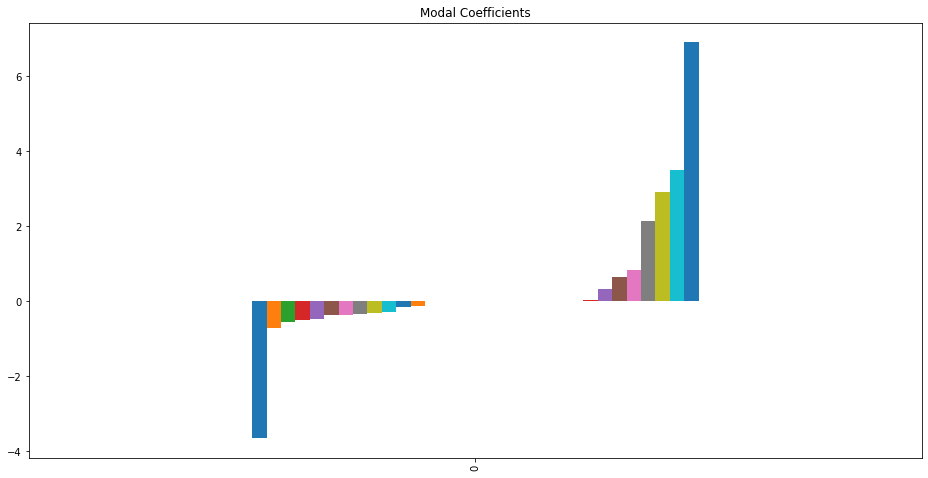

In [273]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [247]:
lasso_coef01.T

,0
AB,-3.303629
BBA,-0.646068
CS,-0.561798
BB,-0.497794
E,-0.374926
HRA,-0.329642
2B,-0.284872
DP,-0.278727
3B,-0.262978
ER,-0.258259


In [265]:
ols = linear_model.LinearRegression()

In [266]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [267]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [268]:
list(removed_rfe)

['SO', 'HA']

In [269]:
len(list(selected_rfe))

29

In [270]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 3.505234424494185
Testing Root Mean Squared Error: 3.307356566470972
Original:  3.3038984656996053 vs. RFE:  3.307356566470972


In [271]:
selected_rfe

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SB', 'CS', 'HBP', 'SF', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'IPouts', 'HRA', 'BBA', 'SOA', 'E', 'DP',
       'FP', 'run_diff', 'avg', 'OBP', '1B', 'SLG', 'OPS'],
      dtype='object')